## Project Description
This project aims to analyze the dataset using neural networks to classify the images into either of following class – barren land, forest, grassland and others.

In [5]:
# Importing Libraries for reading data 
import numpy as np 
import pandas as pd 

# For visuzlizing images
import matplotlib.pyplot as plt 
from skimage.io import imshow 

# Importing keras sequential model (See readme for details)
from keras.layers import Dense 
from keras.models import Sequential 
from keras.layers import Dense, Activation

from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense,Activation,Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [2]:
# Loading data files for training

print ('Loading training data')
X_train_sat4 = '../input/X_test_sat4.csv'
y_train_sat4 = '../input/y_test_sat4.csv'

# Loading data to pandas dataframe
X_train = pd.read_csv(X_train_sat4)
Y_train = pd.read_csv(y_train_sat4)
X_train = X_train.as_matrix()
Y_train = Y_train.as_matrix()

print("Number of training examples are",X_train.shape[0])

#Reshaping the input to convert into a list for further processing
X_train_img = X_train.reshape([X_train.shape[0],28,28,4]).astype(float)

Loading training data


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


Number of training examples are 99999


In [ ]:
'''# Sequential model in Keras is a linear stack of layers. Sequential model could be created by passing a list of layer instances to the constructor.
model = Sequential()
model.add(Dense(4, input_dim=3136))
model.add(Activation('selu'))
'''

In [3]:
X_train = (X_train-X_train.mean())/X_train.std()

In [ ]:
'''model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train,Y_train,batch_size=32, epochs=5, verbose=1, validation_split=0.02)'''

In [6]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
history = model.fit(X_train_img,Y_train,batch_size=32, epochs=5, verbose=1, validation_split=0.02)

Instructions for updating:
Use tf.cast instead.
Train on 97999 samples, validate on 2000 samples
Epoch 1/5
97999/97999 [==============================] - 32s 330us/step - loss: 0.6069 - acc: 0.8380 - val_loss: 0.1871 - val_acc: 0.9400
Epoch 2/5
97999/97999 [==============================] - 28s 285us/step - loss: 0.2696 - acc: 0.9092 - val_loss: 0.2093 - val_acc: 0.9340
Epoch 3/5
97999/97999 [==============================] - 29s 297us/step - loss: 0.2398 - acc: 0.9195 - val_loss: 0.2109 - val_acc: 0.9210
Epoch 4/5
97999/97999 [==============================] - 28s 286us/step - loss: 0.2347 - acc: 0.9209 - val_loss: 0.2403 - val_acc: 0.9140
Epoch 5/5
97999/97999 [==============================] - 29s 291us/step - loss: 0.2119 - acc: 0.9292 - val_loss: 0.1569 - val_acc: 0.9475


In [9]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


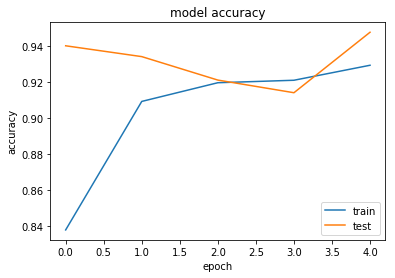

In [10]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

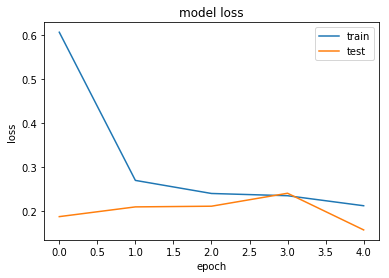

In [11]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()